In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [3]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x-set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [4]:
p = 0.3
X = Bern(p)

In [7]:
rv = stats.bernoulli(p)

In [8]:
rv.pmf(0)

0.7000000000000001

In [9]:
rv.pmf(1)

0.3

In [11]:
rv.pmf([0,1])

array([0.7, 0.3])

In [12]:
rv.cdf([0,1])

array([0.7, 1. ])

In [13]:
rv.mean(), rv.var()

(0.3, 0.21)

In [14]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p ** x * (1-p) * (n-x)
        else:
            return 0
    return x_set, f

In [18]:
n= 10
p = 0.3
X = Bin(n, p)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [21]:
def E(x, g=lambda x:x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    plt.show()

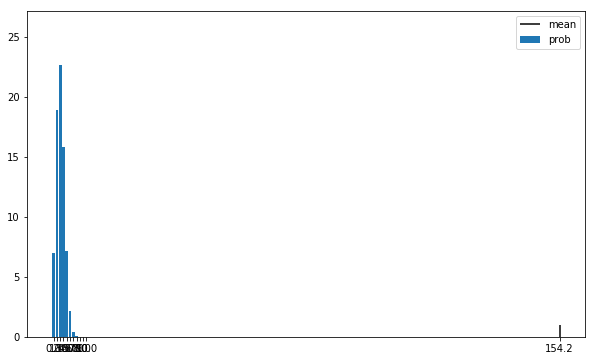

In [22]:
plot_prob(X)

In [23]:
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f

In [24]:
p = 0.5
X = Ge(p)

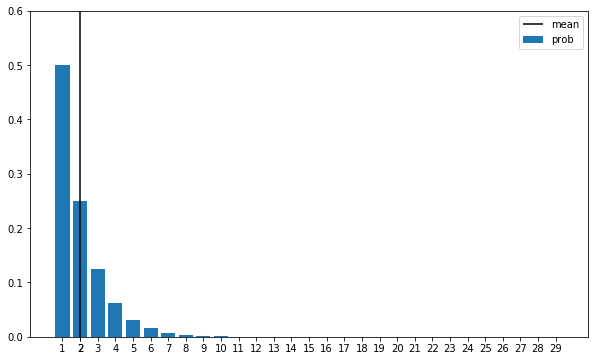

In [25]:
plot_prob(X)

In [26]:
from scipy.special import factorial
def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x)/factorial(x)*np.exp(-lam)
        else:
            return 0
    return x_set, f

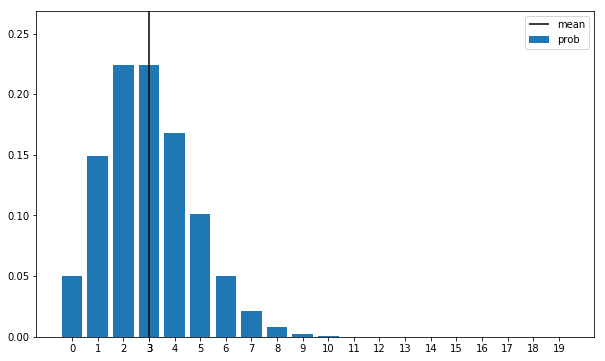

In [27]:
lam = 3
X = Poi(lam)
plot_prob(X)